In [25]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("kobe.csv")

# Show an augmented dataframe
pd.set_option('display.max_columns', 30)

print(df)

              action_type combined_shot_type  game_event_id   game_id  \
0               Jump Shot          Jump Shot             10  20000012   
1               Jump Shot          Jump Shot             12  20000012   
2               Jump Shot          Jump Shot             35  20000012   
3               Jump Shot          Jump Shot             43  20000012   
4       Driving Dunk Shot               Dunk            155  20000012   
5               Jump Shot          Jump Shot            244  20000012   
6              Layup Shot              Layup            251  20000012   
7               Jump Shot          Jump Shot            254  20000012   
8               Jump Shot          Jump Shot            265  20000012   
9       Running Jump Shot          Jump Shot            294  20000012   
10              Jump Shot          Jump Shot            309  20000012   
11              Jump Shot          Jump Shot              4  20000019   
12      Running Jump Shot          Jump Shot       

In [26]:
# Check if there are N/A objects
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [27]:
# We have some N/A's in the shot_made_flag column. We can remove all rows with missing values using the dropna() function.

df = df.dropna(how='any')   #to drop if any value in the row has a N/A

# Show 'shot_made_flag' column in order to see that missing values were removed

print(df['shot_made_flag'])

1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
6        1.0
8        1.0
9        0.0
10       0.0
11       1.0
12       1.0
13       0.0
14       0.0
15       0.0
17       1.0
18       0.0
20       0.0
21       0.0
22       1.0
23       1.0
24       1.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       1.0
31       0.0
38       1.0
39       1.0
        ... 
30661    1.0
30662    0.0
30663    0.0
30665    0.0
30666    0.0
30667    0.0
30669    0.0
30670    0.0
30671    0.0
30672    1.0
30673    0.0
30674    1.0
30675    0.0
30676    1.0
30677    0.0
30678    0.0
30679    0.0
30681    1.0
30683    0.0
30684    0.0
30685    0.0
30687    0.0
30688    1.0
30689    0.0
30690    0.0
30691    0.0
30692    0.0
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 25697, dtype: float64


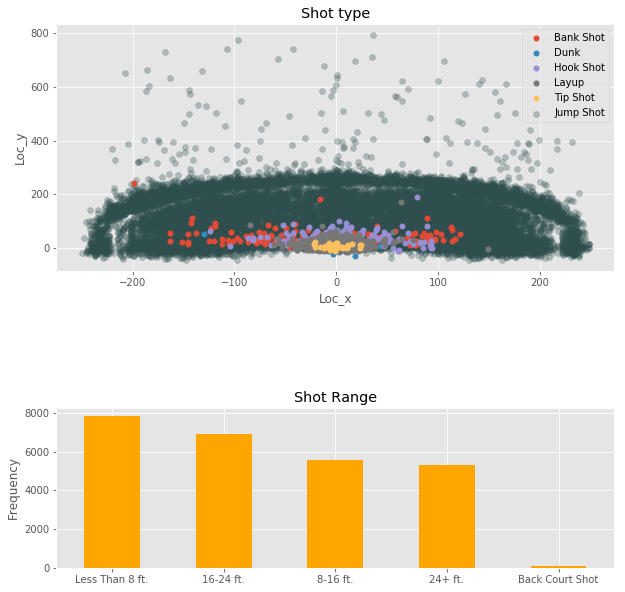

In [28]:
# Scatter plot

# Use ggplot style

plt.style.use('ggplot')

plt.figure(1)

ax = plt.subplot(211)

# Break the data frame into two cases

df1 = df[df['combined_shot_type'].str.contains("Jump Shot")]

# Add a specific color to Jump Shot category

ax.scatter(df1['loc_x'], df1['loc_y'], c="darkslategrey", alpha=0.3, label="Jump Shot")

# Data frame without Jump Shot

df2 = df[df['combined_shot_type'].str.contains('Jump Shot')==False]

# Group by type of shot

groups = df2.groupby('combined_shot_type')

# Loop to compute those groups

for name, group in groups:
    ax.plot(group['loc_x'], group['loc_y'], marker='o', linestyle='', ms=5, label=name)

ax.legend(loc='upper right')

ax.set_title('Shot type')

ax.set_xlabel('Loc_x')

ax.set_ylabel('Loc_y')

ax2 = plt.subplot(313)

df['shot_zone_range'].value_counts().plot('bar', color='orange', rot=0)

ax2.set_ylabel('Frequency')

ax2.set_title('Shot Range')

plt.savefig('ScatterClassPlot.png')

plt.rcParams['figure.figsize'] = [10, 10]

plt.show()